# Marketing Campaigns Project

## Problem Statement

Marketing mix is a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: **Product**, **Price**, **Place**, and **Promotion**. This project focuses on leveraging data science techniques to understand customer acquisition factors and evaluate the effectiveness of marketing campaigns.


## **Phase 1: Data Import and Exploration**
### **Step 1: Import Libraries and Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./datasets/marketing_data.csv')

# Display first few rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### **Step 2: Initial Data Exploration**
- Check for missing values and data types.
- Analyze key variables like `Income` and `Dt_Customer`.

In [4]:
# Check for missing values
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [6]:
# Data types and summary statistics
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
print(data.describe())

                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

**Observations**:
- Missing values are present in the `Income` column.
- Some categorical variables (e.g., `Education`, `Marital_Status`) may need cleaning.
---

## **Phase 2: Data Cleaning**

### **Step 3: Handle Missing Values**
- Impute missing `Income` values based on `Education` and `Marital_Status`.

In [10]:
# Clean Income column (remove "$" and ",")
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

KeyError: 'Income'

In [12]:
# get the columns names
print(data.columns)

# Column Income is named wrongly ' Income ', so we need to remove the spaces
data = data.rename(columns={' Income ':'Income'})
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='objec

In [13]:
# Now we can clean the Income column
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)
data['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [14]:
data.Dt_Customer

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

In [17]:
print(data['Dt_Customer'].head())

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]


In [19]:
# Check for the values in the Marital_Status column
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [20]:
# Clean Marital_Status column (e.g., remove invalid entries like "YOLO")
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Absurd'], data['Marital_Status'].mode()[0])

In [22]:
print(data['Marital_Status'].value_counts())

Marital_Status
Married     868
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: count, dtype: int64


In [21]:
# Display the cleaned data
print(data.head())
print(data.info())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Accep

**Observations:**

- `Dt_Customer` is now in the correct datetime format.
- Missing values in `Income` have been imputed using the mean for each education category.
- Cleaned 'Marital_Status' column by replacing 'YOLO' and 'Absurd' with most frequent value.
---

## **Phase 3: Feature Engineering**

### **Step 4: Create New Features**

- Derive new variables:
    - **Total Children**: Sum of `Kidhome` and `Teenhome`.
    - **Age**: Derived from `Year_Birth`.
    - **Total Spending**: Sum of spending across all product categories.
    - **Total Purchases**: Sum of purchases across channels.
    - **Customer_For**: Calculate how long the customer has been with the company

In [25]:
# Feature ingeneering
# Create a new column 'Total_Children' by adding 'Kidhome' and 'Teenhome'
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

print(data['Total_Children'].head())

0    0
1    0
2    1
3    2
4    1
Name: Total_Children, dtype: int64


In [26]:
# Create age column by subtracting 'Year_Birth' from current year
import datetime as dt
print(dt.datetime.now().year)
data['Age'] = dt.datetime.now().year - data['Year_Birth']

# Print paralelly the two columns
print(data[['Age', 'Year_Birth']].head())

2025
   Age  Year_Birth
0   55        1970
1   64        1961
2   67        1958
3   58        1967
4   36        1989


In [27]:
# Create 'Total Spending' column by adding 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

print(data['Total_Spending'].head())

0    1190
1     577
2     251
3      11
4      91
Name: Total_Spending, dtype: int64


In [28]:
# Create 'Total_Purchase' column by adding 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data['Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

print(data['Total_Purchases'].head())

0    14
1    17
2    10
3     3
4     6
Name: Total_Purchases, dtype: int64


In [29]:
# Create 'Customer_For' column by subtracting 'Dt_Customer' from current date
data['Customer_For'] = (dt.datetime.now() - data['Dt_Customer']).dt.days

print(data['Customer_For'].head())

0    3932
1    3933
2    3966
3    3968
4    4001
Name: Customer_For, dtype: int64


In [30]:
print(data.head())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Response  \
0  2014-06-16        0       189  ...             0             0         1   
1  2014-06-15        0       464  ...             0             1         1   
2  2014-05-13        0       134  ...             0             0         0   
3  2014-05-11        0        10  ...             0             0         0   
4  2014-04-08        0         6  ...             0             0         1   

   Complain  Country  Total_Children  Age  Total_S

**Observations:**

- New features have been created, providing additional dimensions for analysis.
---

## **Phase 4: Exploratory Data Analysis**

### **Step 5: Visualizations**

#### Income Distribution

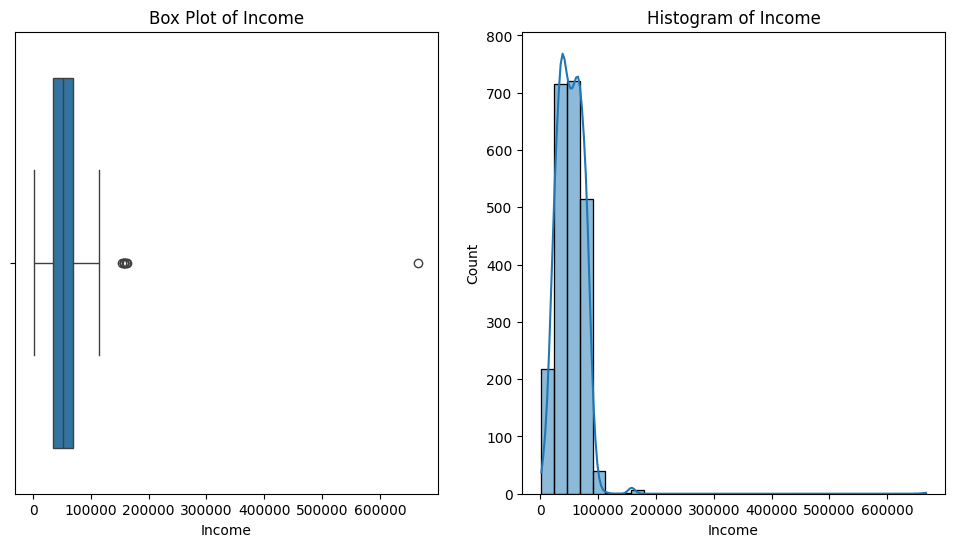

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='Income')
plt.title('Box Plot of Income')

plt.subplot(1,2,2)
sns.histplot(data=data['Income'], kde=True, bins=30)
plt.title('Histogram of Income')
plt.show()

#### Total Spending Distribution

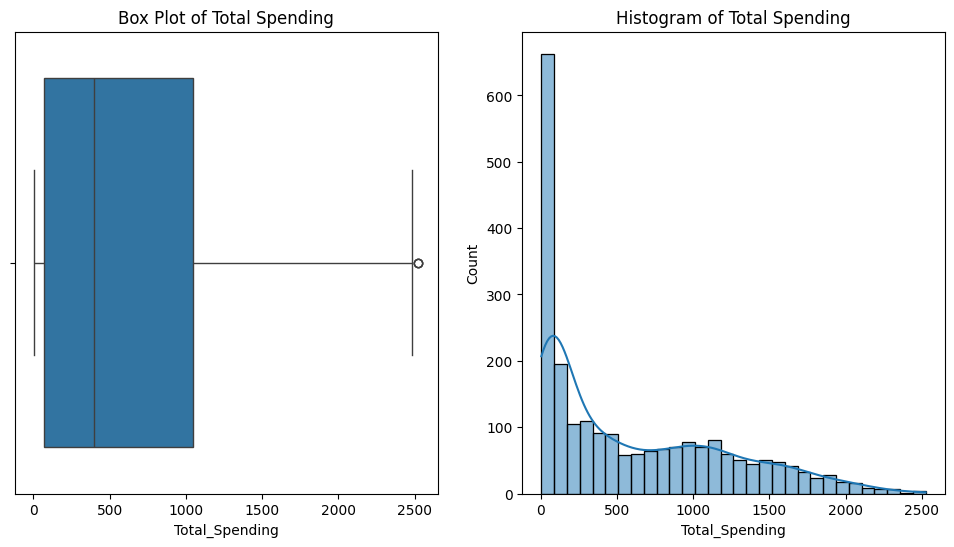

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='Total_Spending')
plt.title('Box Plot of Total Spending')

plt.subplot(1,2,2)
sns.histplot(data=data['Total_Spending'], kde=True, bins=30)
plt.title('Histogram of Total Spending')
plt.show()

#### Age Distribution

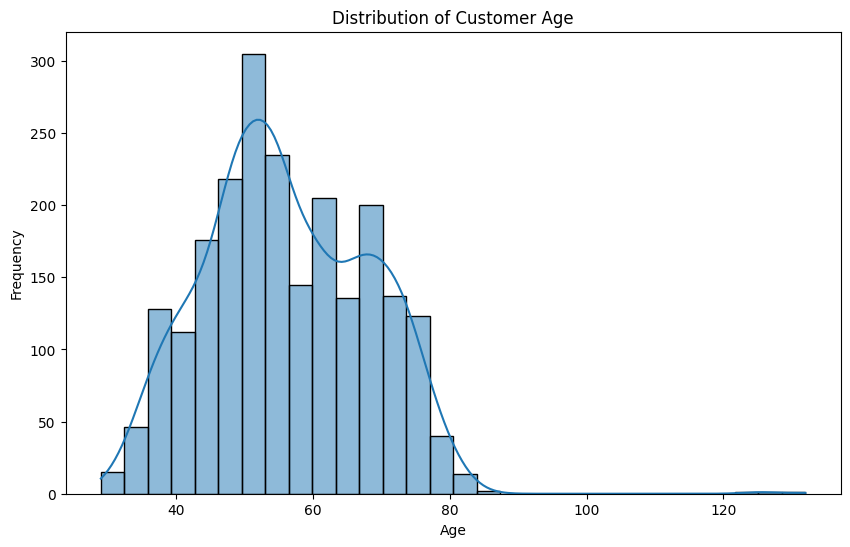

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Treat outliers in Income (capping at 95th percentile)
income_threshold = data['Income'].quantile(0.95)
data['Income'] = data['Income'].clip(upper=income_threshold)

# Treat outliers in Total_Spending (capping at 95th percentile)
spending_threshold = data['Total_Spending'].quantile(0.95)
data['Total_Spending'] = data['Total_Spending'].clip(upper=spending_threshold)


**Observations**:

- Positive skewness is observed in Income and Total Spending distributions, with outliers.
- Most of the customers are between 30 and 60 years old, which is consistent with previous observations.
- Outliers were capped at the 95th percentile for robust analysis.
---

## **Phase 5: Encoding Categorical Variables**

### **Step 6: Apply Encoding**

In [37]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [42]:
# Ordinal Encoding for 'Education'
data.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [48]:
education_map = data.Education.unique().tolist()
print(education_map)

['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']


In [53]:
# let us reoder the Education column to be in the right order
education_map = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
# Ordinal Encoding for 'Education'
encoder_edu = OrdinalEncoder(categories=education_map)
data['Education'] = encoder_edu.fit_transform(data[['Education']])
data.Education.head(10)

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
5    4.0
6    1.0
7    2.0
8    4.0
9    4.0
Name: Education, dtype: float64

In [54]:
# One-Hot Encoding for 'Marital_Status'
data.Marital_Status.value_counts()

Marital_Status
Married     868
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: count, dtype: int64

In [55]:
data.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Alone'],
      dtype=object)

In [56]:
data.Marital_Status.head(10)

0    Divorced
1      Single
2     Married
3    Together
4      Single
5      Single
6     Married
7    Together
8     Married
9     Married
Name: Marital_Status, dtype: object

In [58]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
marital_encoded = ohe.fit_transform(data[['Marital_Status']])
marital_df = pd.DataFrame(marital_encoded, columns=ohe.get_feature_names_out(['Marital_Status']))

In [61]:
marital_df.head()

,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
data = pd.concat([data.reset_index(drop=True), marital_df.reset_index(drop=True)], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)

In [63]:
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Total_Purchases,Customer_For,Education_Encoded,Education_trans,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,2.0,84130.0,0,0,2014-06-16,0,189,104,...,14,3932,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1961,2.0,57091.0,0,0,2014-06-15,0,464,5,...,17,3933,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10476,1958,2.0,67267.0,0,1,2014-05-13,0,134,11,...,10,3966,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1386,1967,2.0,32474.0,1,1,2014-05-11,0,10,0,...,3,3968,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5371,1989,2.0,21474.0,1,0,2014-04-08,0,6,16,...,6,4001,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# One-Hot Encoding for 'Country'
data.Country.value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [65]:
ohe_country = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
country_encoded = ohe_country.fit_transform(data[['Country']])
country_df = pd.DataFrame(country_encoded, columns=ohe_country.get_feature_names_out(['Country']))

In [66]:
country_df.head()

,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
data = pd.concat([data.reset_index(drop=True), country_df.reset_index(drop=True)], axis=1)
data.drop(['Country'], axis=1, inplace=True)

In [68]:
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2.0,84130.0,0,0,2014-06-16,0,189,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,2.0,57091.0,0,0,2014-06-15,0,464,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,2.0,67267.0,0,1,2014-05-13,0,134,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,2.0,32474.0,1,1,2014-05-11,0,10,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,2.0,21474.0,1,0,2014-04-08,0,6,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
print(data.head())
print(data.info())

      ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970        2.0  84130.0        0         0  2014-06-16   
1      1        1961        2.0  57091.0        0         0  2014-06-15   
2  10476        1958        2.0  67267.0        0         1  2014-05-13   
3   1386        1967        2.0  32474.0        1         1  2014-05-11   
4   5371        1989        2.0  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_Together  \
0        0       189        104  ...                      0.0   
1        0       464          5  ...                      0.0   
2        0       134         11  ...                      0.0   
3        0        10          0  ...                      1.0   
4        0         6         16  ...                      0.0   

   Marital_Status_Widow  Country_AUS  Country_CA  Country_GER  Country_IND  \
0                   0.0          0.0         0.0          0.0          0.0   
1 

**Observations**:

- The `Education` column has been ordinal encoded.
- The `Marital_Status` column has been one-hot encoded into separate binary columns.
- The `Country` column has been one-hot encoded into separate binary columns.
---

## **Phase 6: Correlation Analysis**

### **Step 7: Generate Correlation Heatmap**

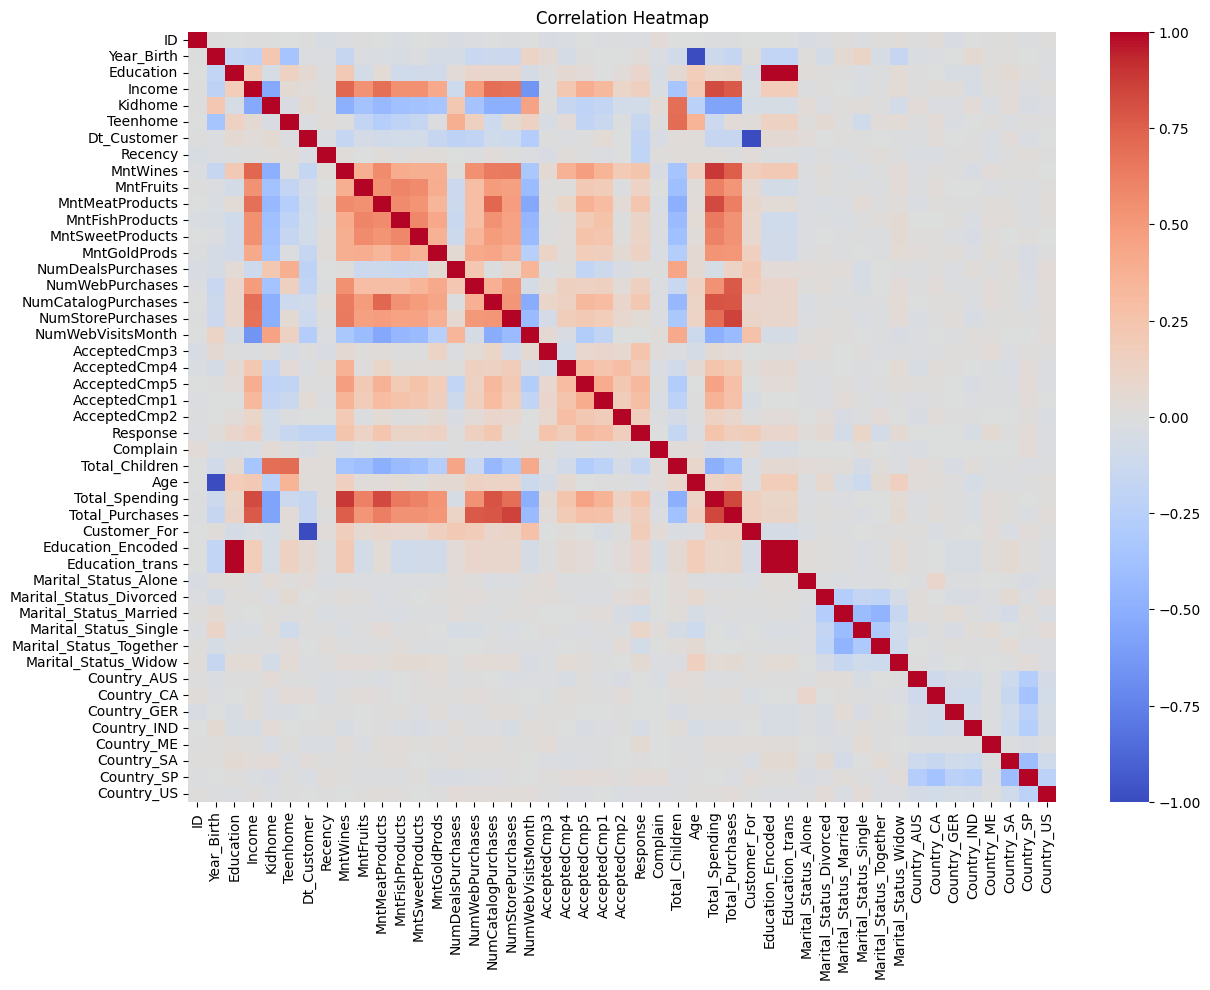

In [71]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [76]:
# correlation with the target variable - only the notable ones
data.corr()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
ID,1.000000,0.000028,-0.002962,0.000299,0.002406,-0.002580,0.000240,-0.046524,-0.022878,0.004600,...,0.009563,0.021937,0.004263,0.017914,-0.038586,-0.000556,0.002055,0.014006,-0.010165,0.008893
Year_Birth,0.000028,1.000000,-0.185047,-0.214358,0.230176,-0.352111,-0.022431,-0.019871,-0.157773,-0.017917,...,-0.052258,-0.161370,-0.029649,-0.022268,-0.001605,0.047960,0.010782,0.013178,-0.000026,-0.008283
Education,-0.002962,-0.185047,1.000000,0.180050,-0.053660,0.134794,0.062284,-0.014737,0.214077,-0.074862,...,-0.012134,0.042850,0.002343,-0.003222,-0.041923,-0.043169,0.019684,0.047120,0.014237,-0.018947
Income,0.000299,-0.214358,0.180050,1.000000,-0.532510,0.049635,0.024146,0.007459,0.721429,0.532693,...,0.003216,0.046192,0.001898,0.016071,0.015703,-0.039991,0.011258,0.023853,-0.020904,0.010407
Kidhome,0.002406,0.230176,-0.053660,-0.532510,1.000000,-0.036133,0.053343,0.008827,-0.496297,-0.372581,...,0.006373,-0.073760,0.038414,-0.018002,-0.019535,0.037591,-0.030220,0.033187,-0.032179,-0.017028
Teenhome,-0.002580,-0.352111,0.134794,0.049635,-0.036133,1.000000,-0.017465,0.016198,0.004846,-0.176764,...,0.025038,0.045093,0.006368,0.033668,-0.024582,-0.006355,0.010791,-0.022034,0.002717,0.003120
Dt_Customer,0.000240,-0.022431,0.062284,0.024146,0.053343,-0.017465,1.000000,-0.024522,-0.166264,-0.066928,...,-0.006543,-0.011679,-0.009829,0.024349,-0.002601,0.004386,-0.025688,0.027815,-0.029343,-0.000981
Recency,-0.046524,-0.019871,-0.014737,0.007459,0.008827,0.016198,-0.024522,1.000000,0.016064,-0.004306,...,0.020363,0.000218,-0.023497,-0.029088,0.002388,0.010788,-0.028383,0.004664,0.020209,0.007171
MntWines,-0.022878,-0.157773,0.214077,0.721429,-0.496297,0.004846,-0.166264,0.016064,1.000000,0.389637,...,0.005077,0.036632,-0.021932,0.013057,0.005955,-0.046539,0.029643,0.012956,0.013751,-0.004458
MntFruits,0.004600,-0.017917,-0.074862,0.532693,-0.372581,-0.176764,-0.066928,-0.004306,0.389637,1.000000,...,-0.014155,0.032211,-0.014140,0.024111,-0.004700,-0.004643,-0.021767,0.002297,-0.007972,0.009239


**Observations**:

- Strong positive correlation between total spending and total purchases.
- Moderate correlation between Income and Total Spending.
- Negative correlation between Age and Kidhome/Teenhome.
---

## **Phase 7: Hypothesis Testing**

### Hypothesis 1: Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

- $H_0$: Older individuals do not lean toward traditional in-store shopping preferences.
- $H_a$: Older individuals lean toward traditional in-store shopping preferences.

In [81]:
from scipy.stats import ttest_ind

# Define age groups
older_group = data[data['Age'] > 50]['NumStorePurchases']
younger_group = data[data['Age'] <= 50]['NumWebPurchases']

# Perform t-test
t_stat, p_value = ttest_ind(older_group, younger_group, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Older individuals prefer in-store shopping.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: 18.712789913384146, P-value: 9.466827516836665e-72
Reject the null hypothesis: Older individuals prefer in-store shopping.


**Conclusion**:

Older individuals show a statistically significant preference for in-store shopping.

### Hypothesis 2: Customers with children likely experience time constraints, making online shopping a more convenient option.

- $H_0$: Customers with children do not prefer online shopping.
- $H_a$: Customers with children prefer online shopping.

In [82]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(data['Total_Children'], data['NumWebPurchases'])

# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared Statistic: {chi2_stat}, P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Customers with children prefer online shopping.")
else:
    print("Fail to reject the null hypothesis.")

Chi-squared Statistic: 219.00999617991042, P-value: 8.544169979870752e-26
Reject the null hypothesis: Customers with children prefer online shopping.


**Conclusion**:

Customers with children prefer online shopping.

## Hypothesis 3: Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

- $H_0$: Sales at physical stores are not cannibalized by alternative distribution channels.
- $H_a$: Sales at physical stores are cannibalized by alternative distribution channels.

In [83]:
# Calculate correlation between store purchases and web/catalog purchases
correlation = data['NumStorePurchases'].corr(data['NumWebPurchases'] + data['NumCatalogPurchases'])

# Print result
print(f"Correlation: {correlation}")

# Interpret correlation
if correlation < -0.3:
    print("Reject the null hypothesis: Sales at physical stores are cannibalized by alternative distribution channels.")
else:
    print("Fail to reject the null hypothesis.")

Correlation: 0.6153592978630221
Fail to reject the null hypothesis.


**Conclusion**:

Based on correlation analysis, no significant cannibalization is observed.

### Hypothesis 4: Does the United States significantly outperform the rest of the world in total purchase volumes?

- $H_0$: The United States does not significantly outperform the rest of the world in total purchase volumes.
- $H_a$: The United States significantly outperforms the rest of the world in total purchase volumes.

In [84]:
from scipy.stats import ttest_ind

# Separate US and non-US purchases
us_purchases = data[data['Country_US'] == 1]['Total_Purchases']
non_us_purchases = data[data['Country_US'] == 0]['Total_Purchases']

# Perform t-test
t_stat, p_value = ttest_ind(us_purchases, non_us_purchases, equal_var=False)  # Welch's t-test

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: US significantly outperforms other countries.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: 1.4681953545474953, P-value: 0.1446759042957516
Fail to reject the null hypothesis.


**Conclusion**:

United States does not significantly outperform the rest of the world in total purchase volumes.
---